# Plots for Digit Network

## Load Digits and Network

In [1]:
# Import packages
import sys
# If academia_ai is not installed, include its path here
if '../..' not in sys.path:
    sys.path.append('../..')
import numpy as np
from timeit import default_timer as timer
# Can use inline instead of notebook or remove this magic and use
# plt.show() to get plots in seperate windows
%matplotlib notebook 
import matplotlib.pyplot as plt
import academia_ai as ai

Reloaded cnn!
Reloaded leafs!
Loaded preprocessing!
Reloaded plotting!


In [ ]:
# Load digits from disk into collection D (optional filepath to archive "MNIST_academia.npz")
D = ai.digits.DigitCollection()
# Can access training images and solutions as "D.training_images" and  "D.training_solutions"
# and test images and solutions for validation as "D.test_images", "D.test_solutions"

In [ ]:
net_trained = ai.ConvolutionalNeuralNet.load('data/digit_network_trained.pkl')

In [ ]:
# Check probability for successful identification
net_trained.test_net(D.test_images, D.test_solutions)

## Various Plots

### Create color map for our plots

In [ ]:
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LinearSegmentedColormap
custom_cmap = LinearSegmentedColormap.from_list('academia_map', [(0, (150/255,240/255,255/255)),
                                                                (1/3, (1, 1, 1)),
                                                                (2/3, (0, 0, 0)),
                                                                (1, (85/255, 5/255, 5/255))]
                                            )

data = np.random.rand(10,10) * 5 - 2.5
plt.figure(figsize=(3,2.5))
plt.pcolor(data, cmap=custom_cmap)
plt.colorbar()
plt.title('Custom Colormap Example')
plt.tight_layout()

### Forward propagation - plot outputs of each layer

In [6]:
digit_index = 1384 # Change index here to plot another one 
dig = D.training_images[digit_index]
sol = D.training_solutions[digit_index]
result = net_trained.forward_prop(dig, save_intermediate=True)
intermediate = net_trained.intermediate_results

#### Input Image

<IPython.core.display.Javascript object>


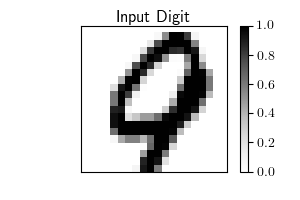

In [7]:
fig = plt.figure(figsize=(3,2))
ax = plt.gca()
im = plt.imshow(dig*D.var+D.mean, cmap='Greys', vmin=0, vmax=1, interpolation='none')
plt.suptitle('Input Digit', fontsize=12, x=0.515, y=0.95)
plt.colorbar()
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
plt.tight_layout(pad=1.5, h_pad=None, w_pad=None)
#plt.savefig('fail_0_correct_7.png', dpi=300)

#### Preprocessed Digit

<IPython.core.display.Javascript object>


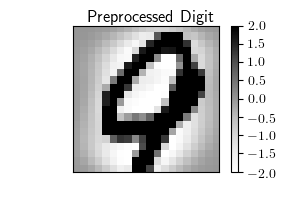

In [8]:
fig = plt.figure(figsize=(3,2))
ax = plt.gca()
im = plt.imshow(dig, cmap='Greys', vmin=-2, vmax=2, interpolation='none')
plt.suptitle('Preprocessed Digit', fontsize=12, x=0.505, y=0.95)
plt.colorbar()
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
plt.tight_layout(pad=1.5, h_pad=None, w_pad=None)
#plt.savefig('d2.png', dpi=300)

#### Layer 1 - Convolution

<IPython.core.display.Javascript object>


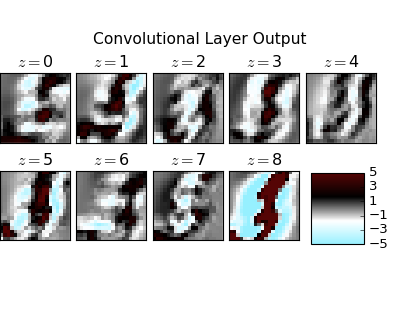

In [23]:
fig = plt.figure(figsize=(5, 4))
fig.suptitle('Convolutional Layer Output', fontsize=14, x=0.5, y=0.90)
gs = gridspec.GridSpec(2, 5)
for x in range(5):
    for y in range(2):
        if x+5*y == 9:
            continue
        ax = plt.subplot(gs[y, x])
        im = plt.imshow(intermediate[1][x+5*y], cmap=custom_cmap, vmin=-5, vmax=5, interpolation='none')
        ax.set_title('$z=$'+str(x+5*y))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
colax = plt.subplot(gs[1, 4])
axarr = fig.get_axes()
diff = np.array(axarr[7].get_position().bounds) - np.array(axarr[5].get_position().bounds)
cb_pos = np.array(axarr[7].get_position().bounds) + diff
cb = plt.colorbar(im, cax=colax)
cb.set_ticks([-5, -3, -1, 1, 3, 5])
gs.tight_layout(fig, pad=0, h_pad=-7, w_pad=0.5, rect=None )
colax.set_position(cb_pos - [-0.011, -0.1370, 0.0005, 0.14])
#plt.savefig('d3.png', dpi=300)

#### Layer 2 - Hyperbolic tangent

<IPython.core.display.Javascript object>


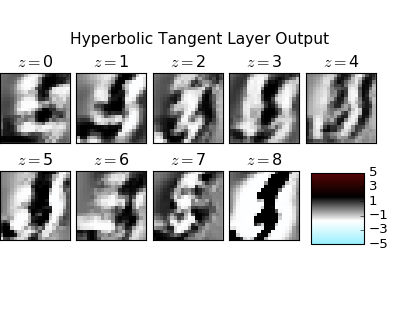

In [24]:
fig = plt.figure(figsize=(5, 4))
fig.suptitle('Hyperbolic Tangent Layer Output', fontsize=14, x=0.5, y=0.90)
gs = gridspec.GridSpec(2, 5)
for x in range(5):
    for y in range(2):
        if x+5*y == 9:
            continue
        ax = plt.subplot(gs[y, x])
        im = plt.imshow(intermediate[2][x+5*y], cmap=custom_cmap, vmin=-5, vmax=5, interpolation='none')
        ax.set_title('$z=$'+str(x+5*y))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
colax = plt.subplot(gs[1, 4])
axarr = fig.get_axes()
diff = np.array(axarr[7].get_position().bounds) - np.array(axarr[5].get_position().bounds)
cb_pos = np.array(axarr[7].get_position().bounds) + diff
cb = plt.colorbar(im, cax=colax)
cb.set_ticks([-5, -3, -1, 1, 3, 5])
gs.tight_layout(fig, pad=0, h_pad=-7, w_pad=0.5, rect=None )
colax.set_position(cb_pos - [-0.011, -0.1370, 0.0005, 0.14])
#plt.savefig('d4.png', dpi=300)

#### Layer 3 - Fully Connected classification layer

<IPython.core.display.Javascript object>


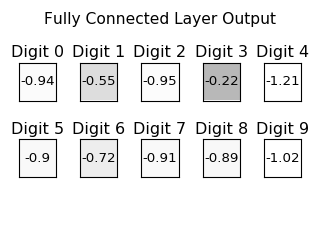

In [25]:
fig, axarr = plt.subplots(2, 5, figsize=(4,3))
plt.suptitle('Fully Connected Layer Output', fontsize=14, x=0.5, y=0.95)
axf = axarr.flatten()
for i in range(10):
    axf[i].imshow(result[i], cmap='Greys', vmin=-1, vmax=1, interpolation='none')
    axf[i].text(0, 0, str(round(result[i][0][0], 2)),
                horizontalalignment='center', verticalalignment='center')
    axf[i].set_title('Digit '+str(i))
    axf[i].get_xaxis().set_visible(False)
    axf[i].get_yaxis().set_visible(False)
plt.tight_layout(pad=1, h_pad=-2.5)
#plt.savefig('d5.png', dpi=300)

In [26]:
print('Classified label:', np.argmax(result))
print('Correct label:', np.argmax(sol))

Classified label: 3
Correct label: 3


### Track training progress

In [8]:
learned_digits = []
class_success = []

In [9]:
from itertools import cycle, islice
image_delivery = cycle(D.training_images)
solution_delivery = cycle(D.training_solutions)
def training_batch(n):
    tr = islice(image_delivery, n)
    so = islice(solution_delivery, n)
    return tr, so
def train_batch(n, rate=1e-5):
    tr, so = training_batch(int(n))
    net.train(tr, so, rate, 1)
    learned_digits.append(int(n))
    class_success.append(net.test_net(D.test_images, D.test_solutions))

In [10]:
n_iter = np.logspace(6.3, 6.5, num=2, endpoint=True, base=10.0, dtype=None)
for n in n_iter:
    train_batch(int(n))
    print(int(n), class_success[-1])

NameError: name 'net' is not defined

In [11]:
n1 = np.logspace(0,5,20)
n2 = np.logspace(5.3,6,3)
n3 = np.logspace(6.3,6.5,2)
n_tot = np.hstack((n1,n2,n3))
print(n_tot.shape)
n_cumulative = np.cumsum(n_tot)

(25,)


In [12]:
plt.figure(figsize=(4,3))
plt.title('Network Training Progress')
plt.plot(np.log10(n_cumulative), class_success, 'bo-')
plt.xticks([0,1,2,3,4,5,6,7])
plt.ylim(0, 1)
plt.ylabel('Classification Success')
plt.xlabel('Learned Digits $\log_{10}(d)$')
plt.tight_layout()
#plt.savefig('training.png', dpi=300)

<IPython.core.display.Javascript object>

ValueError: x and y must have same first dimension